In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]


In [9]:
geography = pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
gender = pd.get_dummies(X['Gender'],drop_first=True,dtype=int)
X = pd.concat([X,geography,gender],axis = 1)
X = X.drop(['Geography','Gender'],axis = 1)

In [ ]:
X.isna().sum()


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
Germany            0
Spain              0
Male               0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [16]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input

In [26]:
Classifier = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(6,activation='relu',kernel_initializer='he_uniform'),
    Dense(6,activation='relu',kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform')
])


In [27]:
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model_history = Classifier.fit(X_train,y_train,
                               validation_split = 0.33,
                               batch_size = 10,
                               verbose = 1,
                               epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7882 - loss: 0.6131 - val_accuracy: 0.7955 - val_loss: 0.5290
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7959 - loss: 0.5142 - val_accuracy: 0.7955 - val_loss: 0.4875
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4849 - val_accuracy: 0.7955 - val_loss: 0.4704
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4720 - val_accuracy: 0.7955 - val_loss: 0.4587
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.4626 - val_accuracy: 0.7955 - val_loss: 0.4510
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.4563 - val_accuracy: 0.7955 - val_loss: 0.4461
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4480 - val_accuracy: 0.7955 - val_loss: 0.4414
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4487 - val_accu

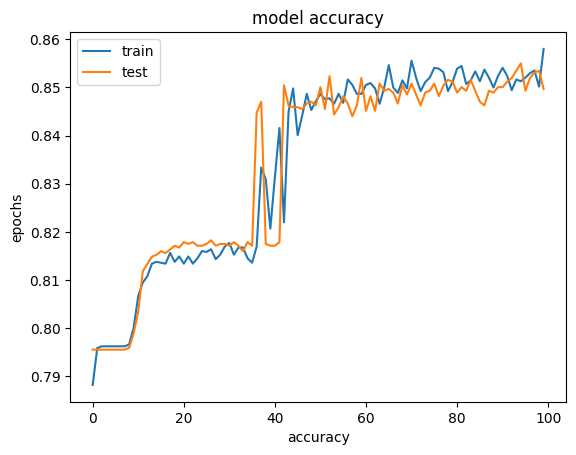

In [ ]:
plt.plot(model_history.history['accuracy'],label = "train")
plt.plot(model_history.history['val_accuracy'],label = "test")
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.title("model accuracy")
plt.legend()
plt.show()



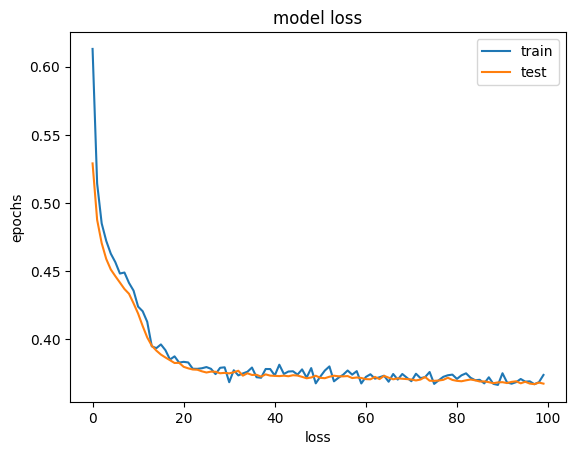

In [31]:
plt.plot(model_history.history['loss'],label = "train")
plt.plot(model_history.history['val_loss'],label = "test")
plt.xlabel("loss")
plt.ylabel('epochs')
plt.title("model loss")
plt.legend()
plt.show()


In [33]:
y_pred = Classifier.predict(X_test)
y_pred =    (y_pred >0.5) # because the output is sigmoid  >0.5 is 1 ow 0
    

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
    from sklearn.metrics import confusion_matrix,accuracy_score
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)

    print("confusion mat",cm)
    print("accuracy",acc)   


confusion mat [[1556   39]
 [ 242  163]]
accuracy 0.8595
